In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::',header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::',header=None, names=mnames, engine='python',encoding='latin-1')

## Nans

In [14]:
print("Nans in users")
print(users.isna().sum(), "\n")


print("Nans in ratings")
print(ratings.isna().sum(), "\n")

print("Nans in movies")
print(movies.isna().sum(),  "\n")

Nans in users
user_id       0
gender        0
age           0
occupation    0
zip           0
dtype: int64 

Ratings in ratings
user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64 

Nans in movies
movie_id    0
title       0
genres      0
dtype: int64 



## Duplicates

In [16]:
print("Duplicated in users")
print(users.duplicated().sum(), "\n")


print("Duplicated in ratings")
print(ratings.duplicated().sum(), "\n")

print("Duplicated in movies")
print(movies.duplicated().sum(),  "\n")

Nans in users
0 

Ratings in ratings
0 

Nans in movies
0 



## Get to know more about movies

/tmp/ipykernel_37785/2331679454.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


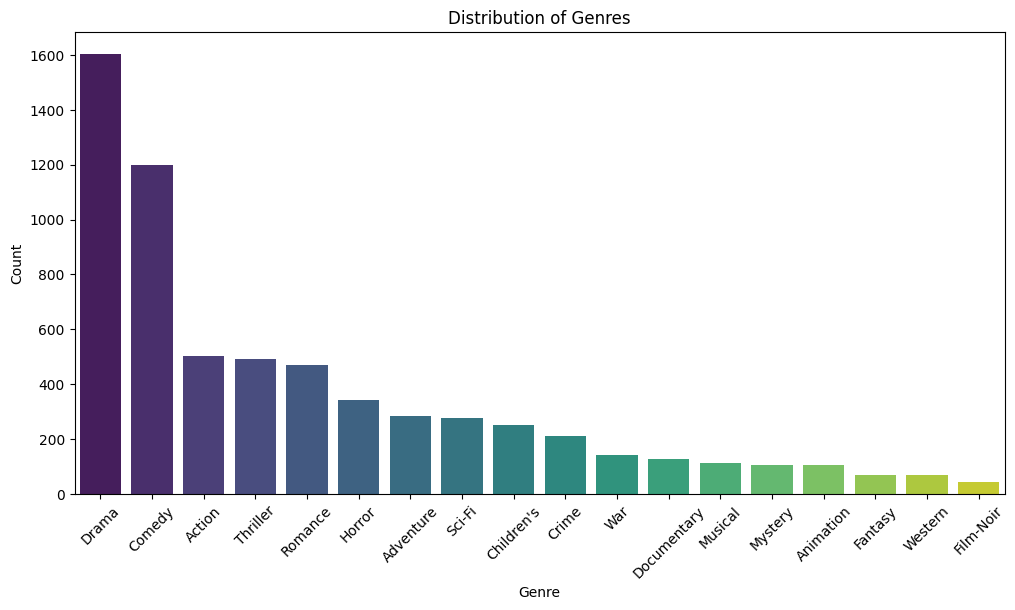

/tmp/ipykernel_37785/2331679454.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(movies['year'], bins=range(movies['year'].min(), movies['year'].max() + 1), kde=False, palette='viridis')


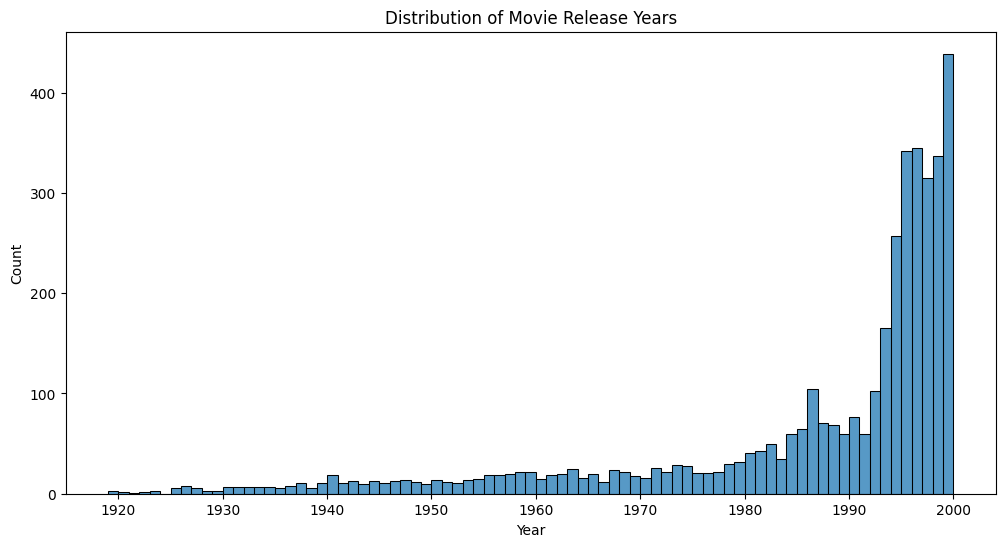

In [2]:
# Preprocess genres
genre_list = movies['genres'].str.split('|').explode()
genre_counts = genre_list.value_counts()

movies['year'] = movies['title'].str.extract(r'\((\d{4})\)').astype(int)
year_counts = movies['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(movies['year'], bins=range(movies['year'].min(), movies['year'].max() + 1), kde=False, palette='viridis')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_37785/3861798225.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='year', y='rating', data=avg_rating_per_year, marker='o', palette='viridis')


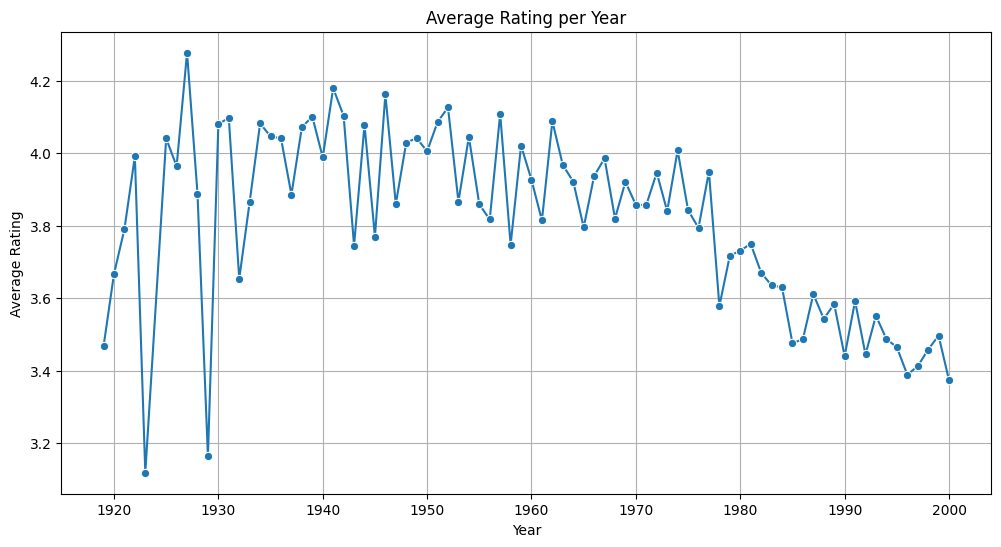

/tmp/ipykernel_37785/3861798225.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='genres', data=avg_rating_per_genre.sort_values(by='rating'), palette='viridis')


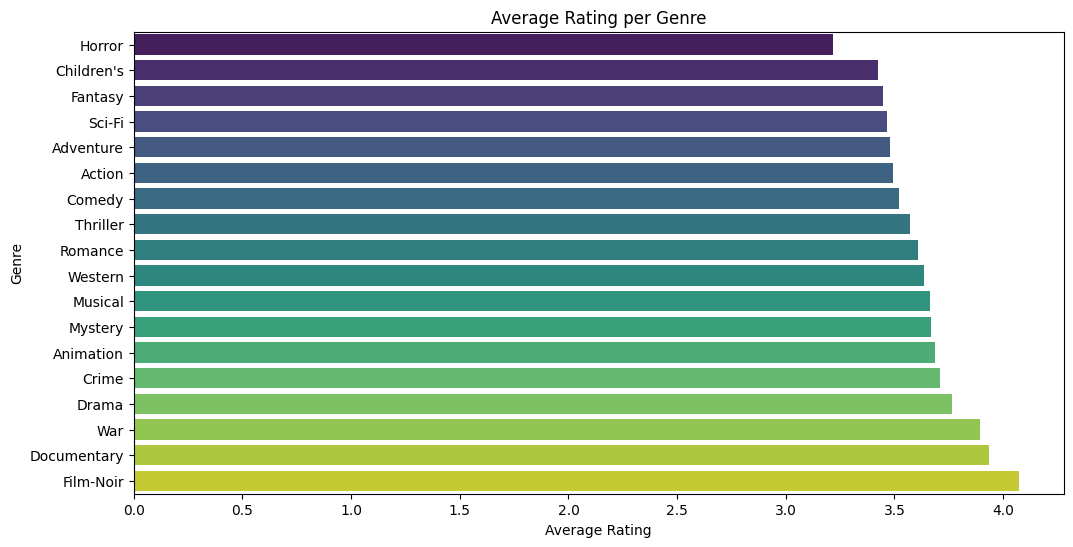

In [4]:
df_rating_movie = pd.merge(ratings,movies,how='left',on='movie_id')

# Calculate average rating per year
avg_rating_per_year = df_rating_movie.groupby('year')['rating'].mean().reset_index()

# Preprocess genres
df_genres = df_rating_movie[['rating', 'genres']].copy()
df_genres['genres'] = df_genres['genres'].str.split('|')
df_genres = df_genres.explode('genres')

# Calculate average rating per genre
avg_rating_per_genre = df_genres.groupby('genres')['rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='rating', data=avg_rating_per_year, marker='o', palette='viridis')
plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='genres', data=avg_rating_per_genre.sort_values(by='rating'), palette='viridis')
plt.title('Average Rating per Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

In [10]:
# We can see that older users tend to give higher ratings
pd.merge(ratings,users,how='left',on='user_id').groupby('age')['rating'].mean()

age
1     3.549520
18    3.507573
25    3.545235
35    3.618162
45    3.638062
50    3.714512
56    3.766632
Name: rating, dtype: float64

In [4]:
# We can see that older users tend to give higher ratings
pd.merge(ratings,users,how='left',on='user_id').groupby('gender')['rating'].mean()

gender
F    3.620366
M    3.568879
Name: rating, dtype: float64

In [5]:
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


<Axes: >

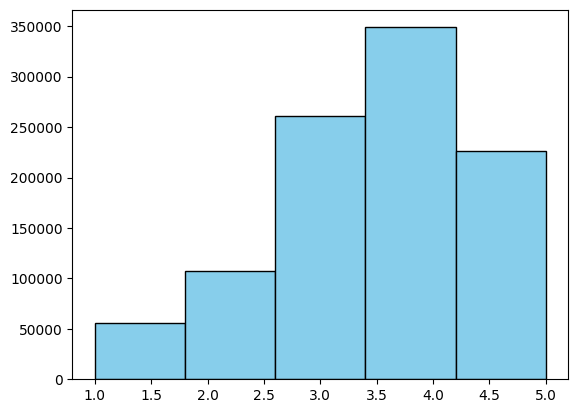

In [7]:
ratings['rating'].hist(bins=5, grid=False, color='skyblue', edgecolor='black')

In [8]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [9]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [19]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


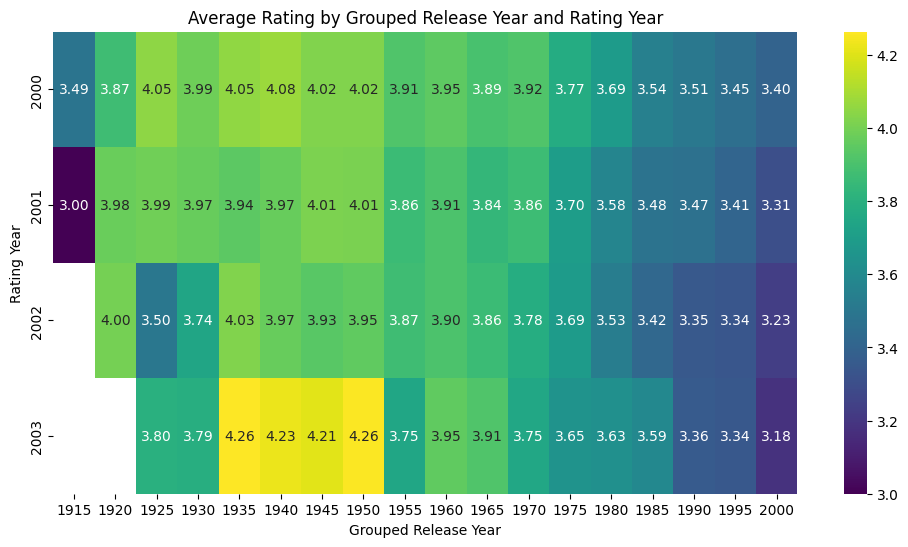

In [23]:
merged_df = pd.merge(ratings, movies, on='movie_id')

# Extract release year from title
merged_df['release_year'] = merged_df['title'].str.extract(r'\((\d{4})\)').astype(int)

# Convert timestamp to year
merged_df['rating_year'] = pd.to_datetime(merged_df['timestamp'], unit='s').dt.year

# Group release years into 5-year intervals
merged_df['release_year_group'] = (merged_df['release_year'] // 5) * 5

# Calculate average rating for each combination of grouped release year and rating year
avg_rating_df = merged_df.groupby(['release_year_group', 'rating_year'])['rating'].mean().reset_index()

# Pivot the DataFrame to a format suitable for a heatmap
pivot_table = avg_rating_df.pivot(index='rating_year', columns='release_year_group', values='rating')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='viridis')
plt.title('Average Rating by Grouped Release Year and Rating Year')
plt.xlabel('Grouped Release Year')
plt.ylabel('Rating Year')
plt.show()

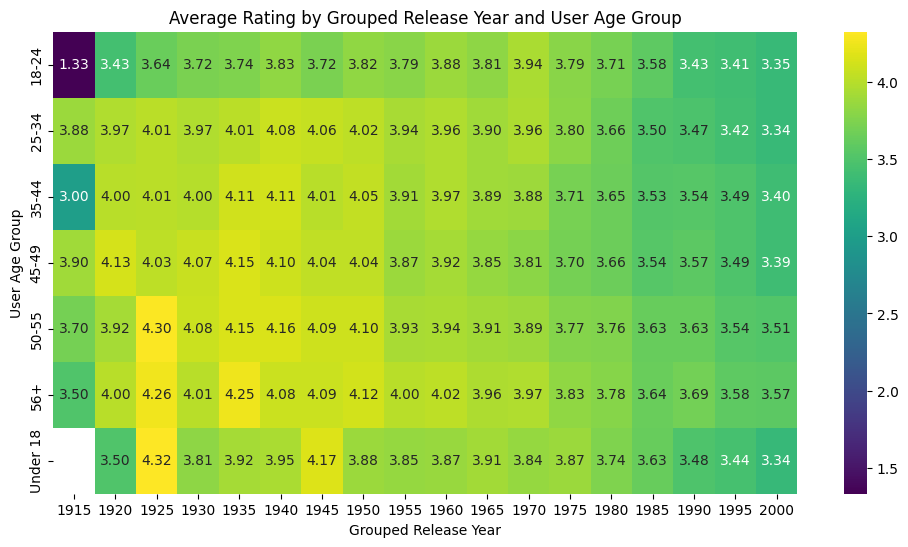

In [24]:
age_groups = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

# Merge ratings and movies on movie_id
merged_df = pd.merge(ratings, movies, on='movie_id')

# Merge the result with users on user_id
merged_df = pd.merge(merged_df, users, on='user_id')

# Extract release year from title
merged_df['release_year'] = merged_df['title'].str.extract(r'\((\d{4})\)').astype(int)

# Convert timestamp to year
merged_df['rating_year'] = pd.to_datetime(merged_df['timestamp'], unit='s').dt.year

# Group release years into 5-year intervals
merged_df['release_year_group'] = (merged_df['release_year'] // 5) * 5

# Map age codes to age groups
merged_df['age_group'] = merged_df['age'].map(age_groups)

# Calculate average rating for each combination of grouped release year and user age group
avg_rating_df = merged_df.groupby(['release_year_group', 'age_group'])['rating'].mean().reset_index()

# Pivot the DataFrame to a format suitable for a heatmap
pivot_table = avg_rating_df.pivot(index='age_group', columns='release_year_group', values='rating')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='viridis')
plt.title('Average Rating by Grouped Release Year and User Age Group')
plt.xlabel('Grouped Release Year')
plt.ylabel('User Age Group')
plt.show()